In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.datasets import boston_housing

In [ ]:
# 데이터 불러오기
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [ ]:
# 데이터 전처리(정규화)
# 데이터 정규화의 기본적인 방법은 각 데이터에서 평균값을 뺀 다음 표준편차로 나누는 것.
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [ ]:
# Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
# 결과가 하나이기 때문에 마지막 units = 1
'''
* units: 해당 은닉층에서 활동하는 뉴런의 수
* activation: 활성화함수, 해당 은닉층의 가중치와 편향의 연산 결과를 어느 함수에 적합하여 출력할 것인가?
* input_shape: 입력 벡터의 크기, 여기서 13은 해당 데이터 프레임의 열의 수를 나타낸다. 데이터의 구조(이미지, 영상)에 따라 달라질 수 있다. 첫 번째 은닉층에서만 정의해준다.
'''

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
'''
* compile은 모델의 최적화와 관련되는 메서드이다. 모델에게 최적화를 위해 어떤 동작을 할지를 가르쳐주는 메서드
* loss: 손실 계산 함수를 정의한다. 손실 계산 함수가 중요한 이유는 모델 결과를 판단하는 지표가 되기 때문이다. 
* optimizer: 최적화 함수를 정의한다. 즉, loss를 가장 낮게하는 학습을 할 수 있도록 그 기준을 계산할 수 있는 함수를 정의한다.
* 즉, compile 메서드에서 하는 일은 loss를 최소화하는 최적화 방안을 정의하는 것이라고 할 수 있다. 
'''
model.summary()
'''
* 생성된 모델 구조 확인
'''
#[출처] [Tensorflow] tf.keras 주요 함수 정리|작성자 딥상어동

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 52)                728       
                                                                 
 dense_1 (Dense)             (None, 39)                2067      
                                                                 
 dense_2 (Dense)             (None, 26)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


'\n* 생성된 모델 구조 확인\n'

In [ ]:
# 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25)
'''
* 실제 데이터에 fitting을 진행하고 진행 내역을 객체에 기록
* train_X, train_Y: 학습시킬 데이터셋 정의 
* epochs: 학습 반복 횟수
* batch_size: 학습 시 한번에 들어가는 데이터의 크기
* validation_split: train_set에서 몇 %를 검증 set으로 분리할지 결정
'''
#[출처] [Tensorflow] tf.keras 주요 함수 정리|작성자 딥상어동

Epoch 1/50
10/10 [==============================] - 1s 36ms/step - loss: 1.4071 - val_loss: 1.4025
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.6784 - val_loss: 0.6364
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.4793 - val_loss: 0.4860
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.3678 - val_loss: 0.3256
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3209 - val_loss: 0.2816
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.3021 - val_loss: 0.2318
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.3202 - val_loss: 0.4812
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2698 - val_loss: 0.2825
Epoch 9/50
10/10 [==============================] - 0s 6ms/step - loss: 0.2138 - val_loss: 0.1920
Epoch 10/50
10/10 [==============================] - 0s 4ms/step - loss: 0.1934 - val_loss: 0.3868
Epoch 11/50
10/10

'\n* 실제 데이터에 fitting을 진행하고 진행 내역을 객체에 기록\n* train_X, train_Y: 학습시킬 데이터셋 정의 \n* epochs: 학습 반복 횟수\n* batch_size: 학습 시 한번에 들어가는 데이터의 크기\n* validation_split: train_set에서 몇 %를 검증 set으로 분리할지 결정\n'

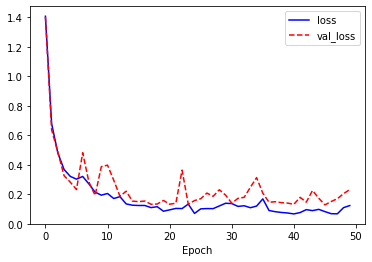

In [ ]:
# 회귀 모델 학습 결과 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)
'''
* 가중치에 영향을 줄 수 있는 데이터셋은 train_set 뿐이라는 것을 명심, 학습된 네트워크의 성능을 테스트 셋에 적용해서 확인해본다.
'''

4/4 [==============================] - 0s 3ms/step - loss: 0.2729


'\n* 가중치에 영향을 줄 수 있는 데이터셋은 train_set 뿐이라는 것을 명심, 학습된 네트워크의 성능을 테스트 셋에 적용해서 확인해본다.\n'

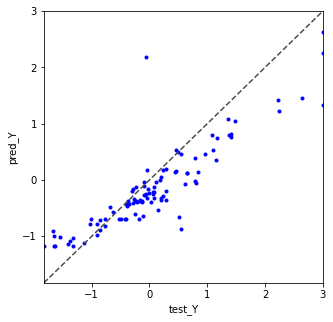

In [ ]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# 모델 재정의 및 학습
# val_loss가 높아지지 않도록, 즉 네트워크가 훈련 데이터에 과적합되지 않도록 학습 도중에 끼어들어서 학습을 멈추도록 한다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=50, batch_size=32, validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
10/10 [==============================] - 1s 28ms/step - loss: 4.0947 - val_loss: 1.0442
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.5790 - val_loss: 0.6206
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4087 - val_loss: 0.3333
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2557 - val_loss: 0.3231
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2495 - val_loss: 0.2711
Epoch 6/50
10/10 [==============================] - 0s 10ms/step - loss: 0.1887 - val_loss: 0.2057
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1564 - val_loss: 0.1776
Epoch 8/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1509 - val_loss: 0.2069
Epoch 9/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1566 - val_loss: 0.2413
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1468 - val_loss: 0.1986
Epoch 11/50
10/10

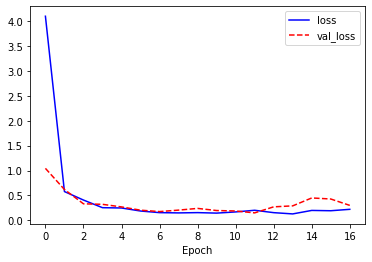

In [ ]:
# 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2025


0.20252618193626404

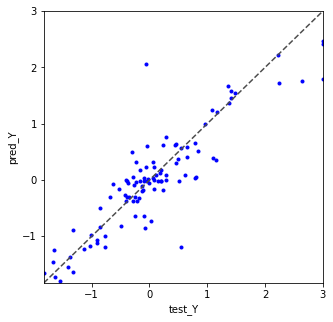

In [ ]:
# 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [ ]:
# Mean Squared Error (평균 제곱 오차)
mse = tf.keras.losses.MeanSquaredError()
mse(train_Y, pred_Y).numpy()

1.87957

In [ ]:
# Root Mean Squared Error (제곱근 평균 제곱 오차)
import math
mse = tf.keras.losses.MeanSquaredError()
math.sqrt(mse(train_Y, pred_Y).numpy())

1.3709741089182605

In [ ]:
# Mean Absolute Error (평균 절대 오차)
mae = tf.keras.losses.MeanAbsoluteError()
mae(train_Y, pred_Y).numpy()

1.0531669

In [ ]:
# Mean Absolute Percentage Error (평균 절대 백분율 오차)
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape(train_Y, pred_Y).numpy()

739.3398